<a href="https://colab.research.google.com/github/Romit-Ghosh/Machine-Learning-/blob/main/ML%20Practical%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
file_path = '/content/shop - shop.csv'
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
df.duplicated().sum()

0

# **UNIVARIATE ANALYSIS**

Text(0, 0.5, 'Frequency')

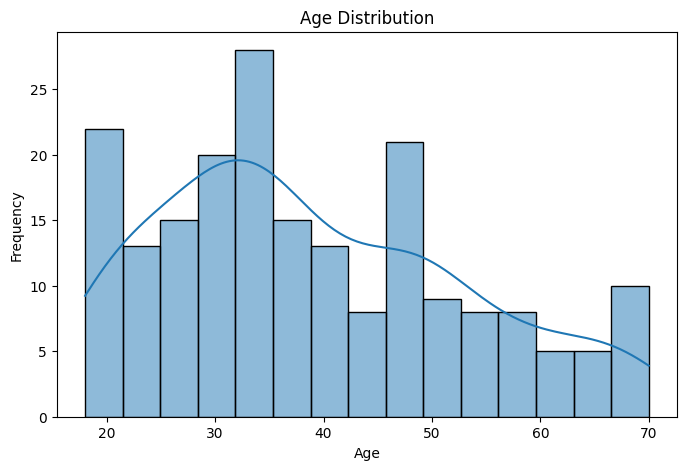

In [9]:
# Plot histogram for Age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=15, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

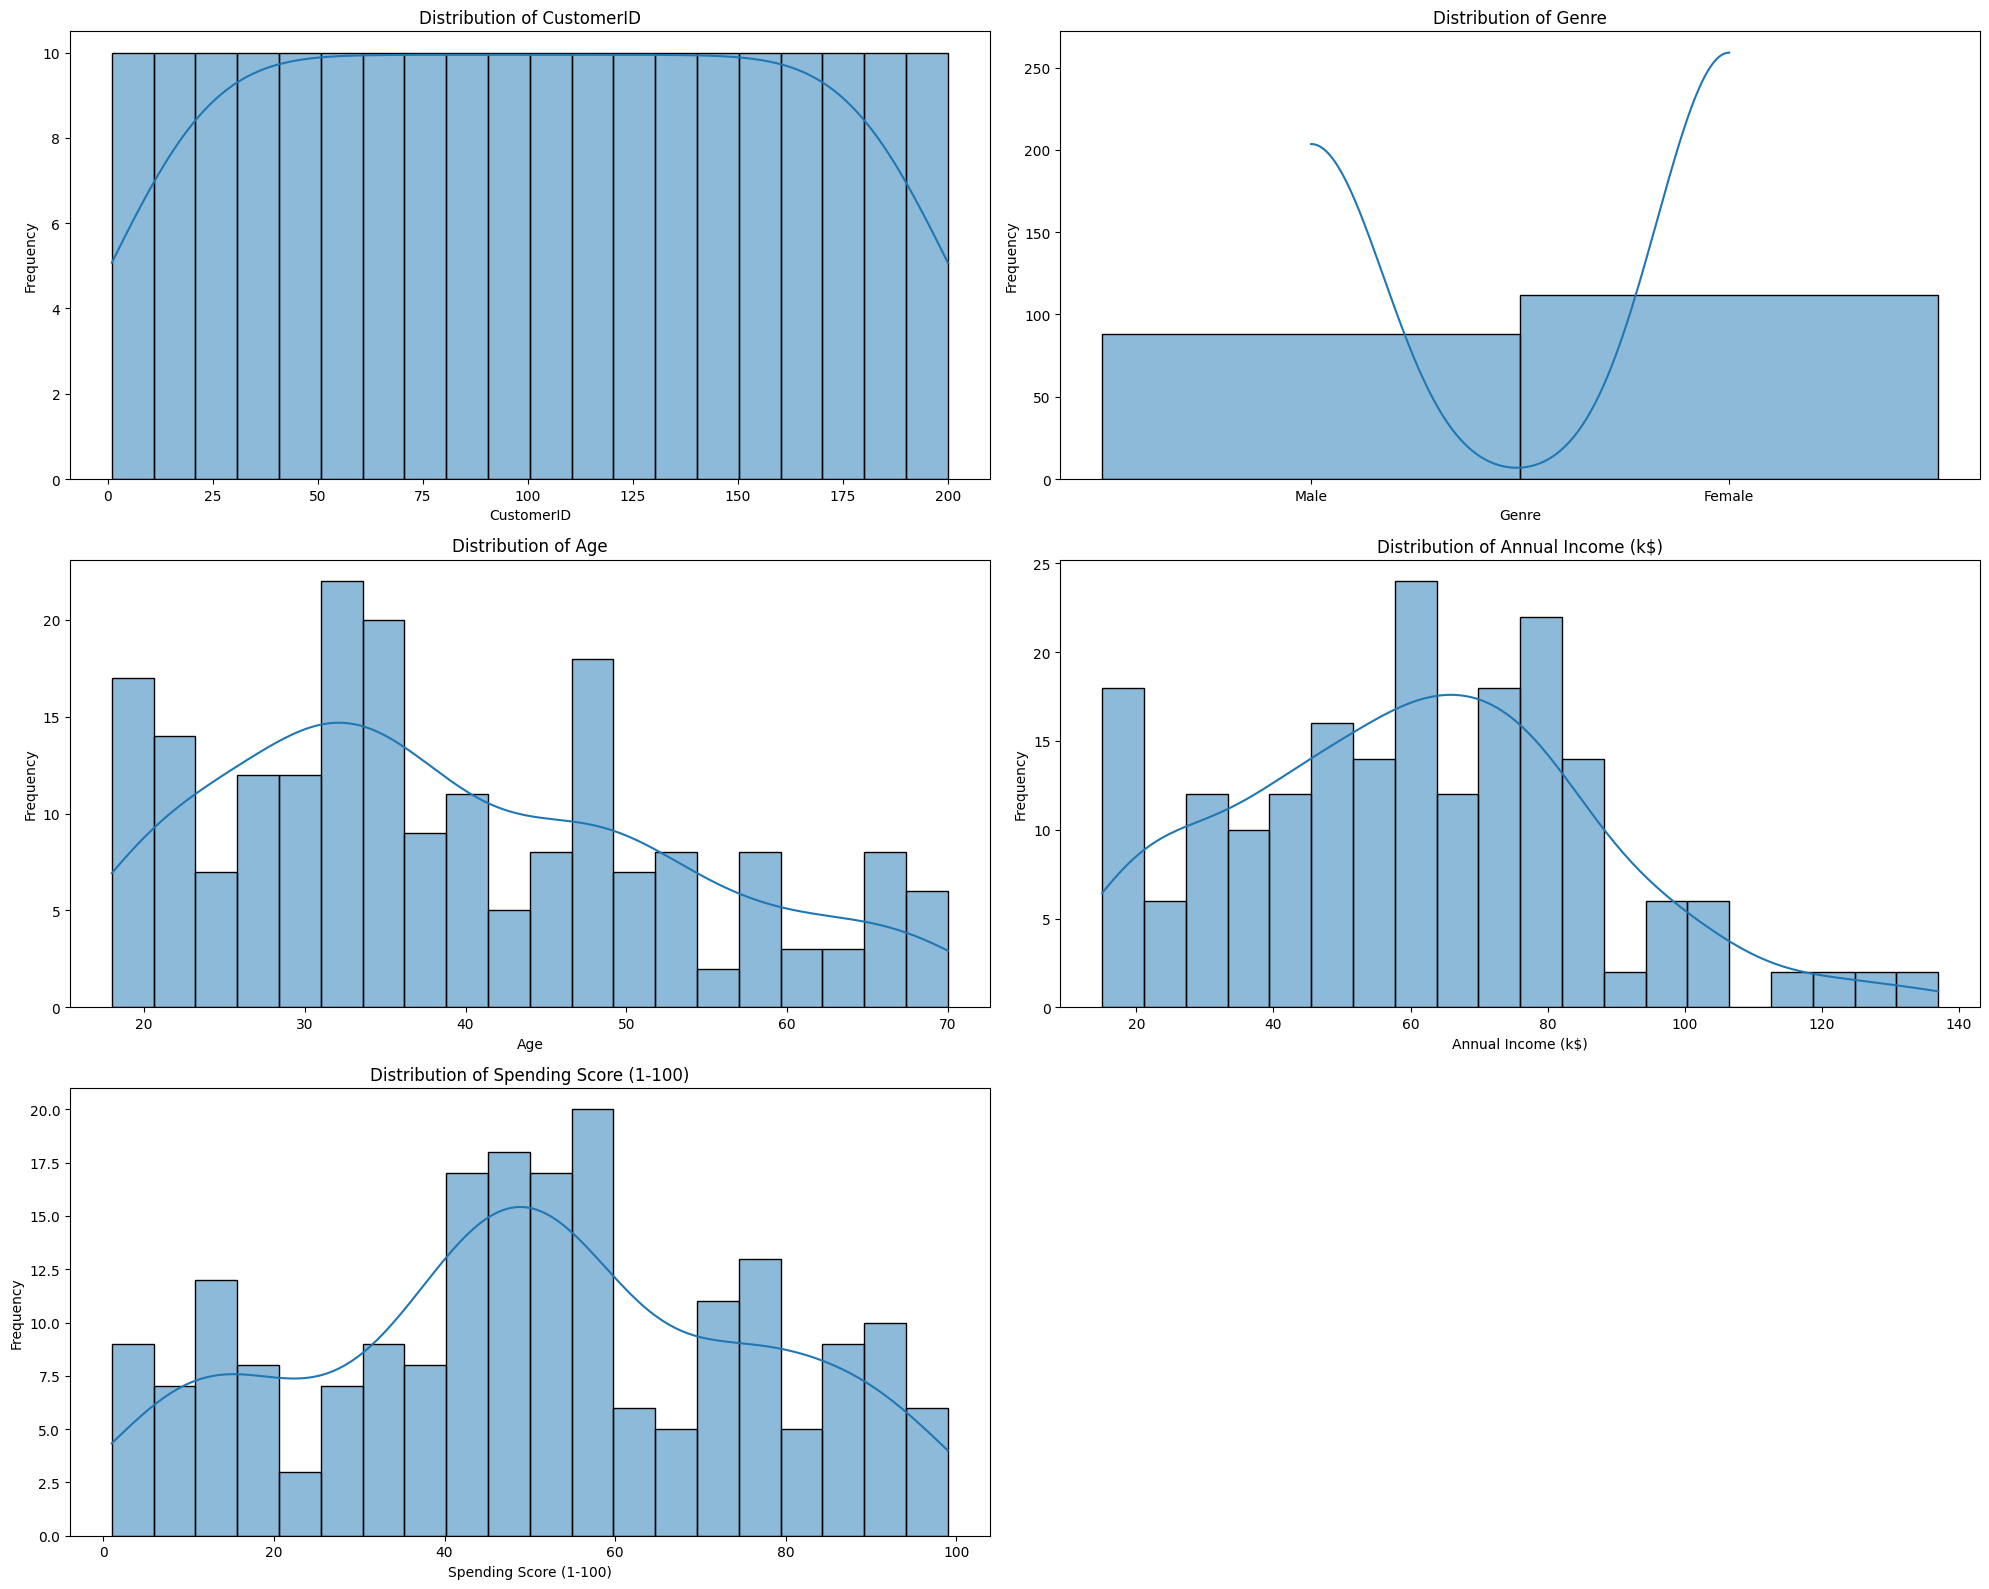

In [11]:
plt.figure(figsize=(20,16))

for i, col in enumerate(df.columns):
  plt.subplot(3,2,i+1)
  sns.histplot(df[col], kde=True, bins=20)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

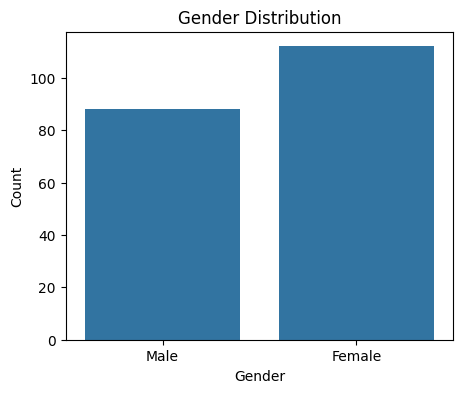

In [12]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Genre', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# **BIVARIATE/MULTIVARIATE ANALYSIS-**

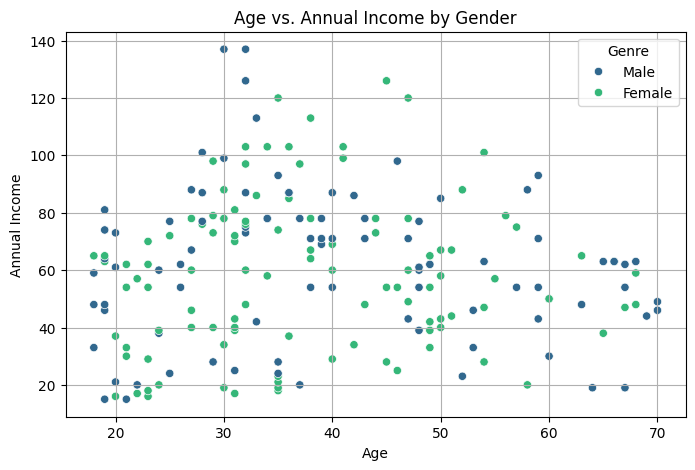

In [13]:
# Scatter plot of Age vs. Annual Income
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Genre', data=df, palette='viridis')
plt.title('Age vs. Annual Income by Gender')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.grid(True)
plt.show()

<Axes: >

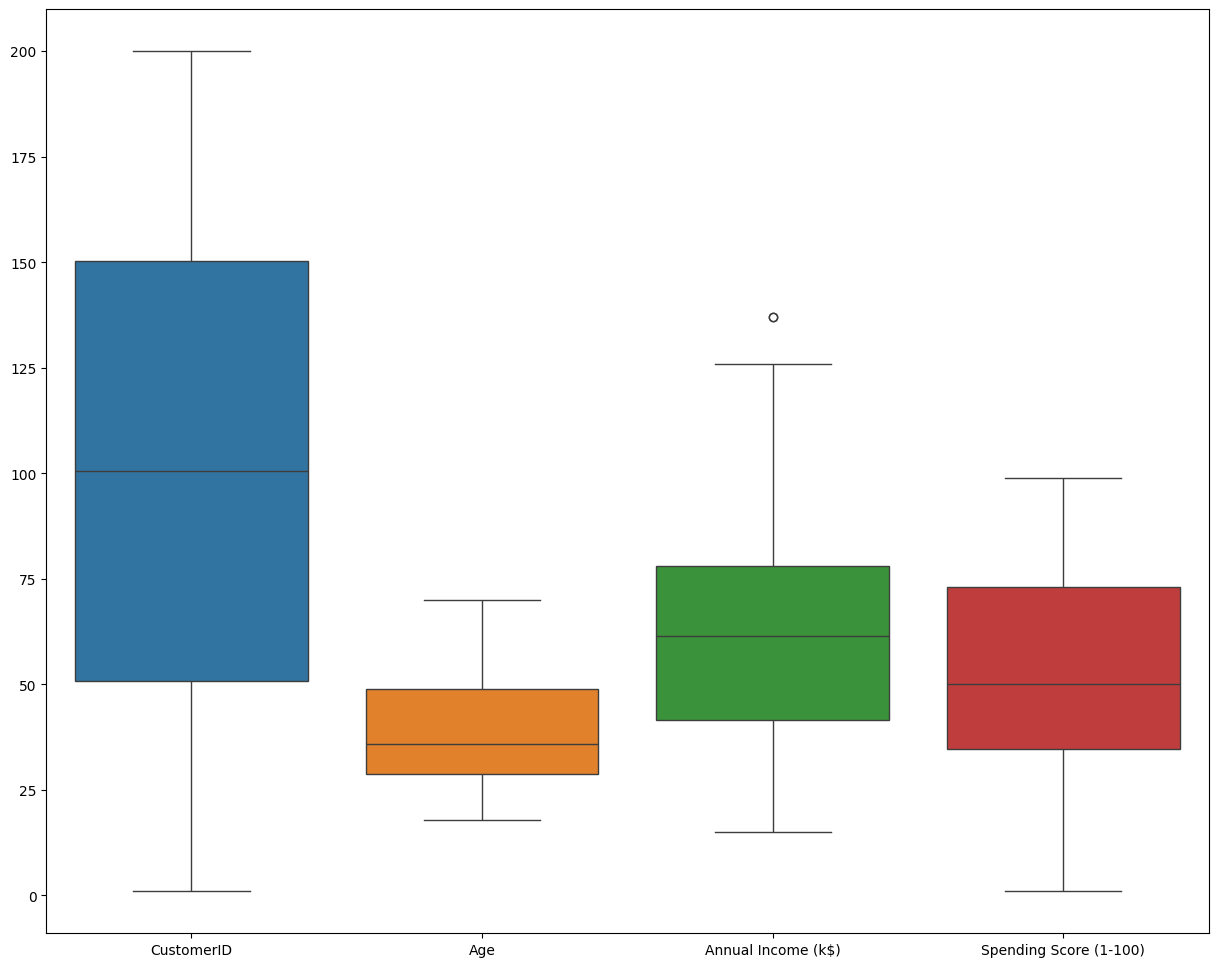

In [14]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df)

Text(0.5, 1.0, 'Correlation Heatmap')

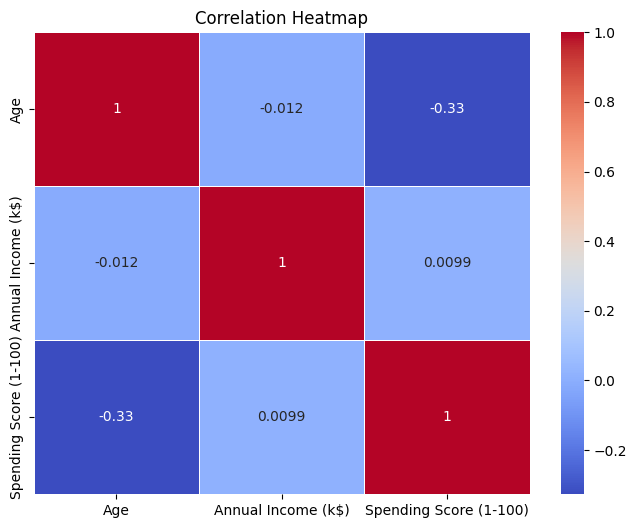

In [20]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns=['CustomerID','Genre']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

# **PREPROCESSING**-

In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [23]:
label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])  # Male: 1, Female: 0

In [24]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [30]:
# Prepare the features for clustering
X = df.drop('CustomerID', axis=1)

# Standardize the features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
X

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [32]:
X_scaled

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

# **MODEL TRAINING-**
## KMeans Algorithm

In [28]:
from sklearn.cluster import KMeans

In [33]:
kmeans = KMeans(n_clusters=2)

In [47]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [48]:
df['cluster'] = kmeans.labels_

In [49]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,0
3,4,0,23,16,77,1
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,0
197,198,1,32,126,74,1
198,199,1,32,137,18,0


In [50]:
kmeans.cluster_centers_

array([[ 0.47169811, 42.32075472, 70.64150943, 17.30188679],
       [ 0.42857143, 37.59863946, 56.92517007, 62.06122449]])

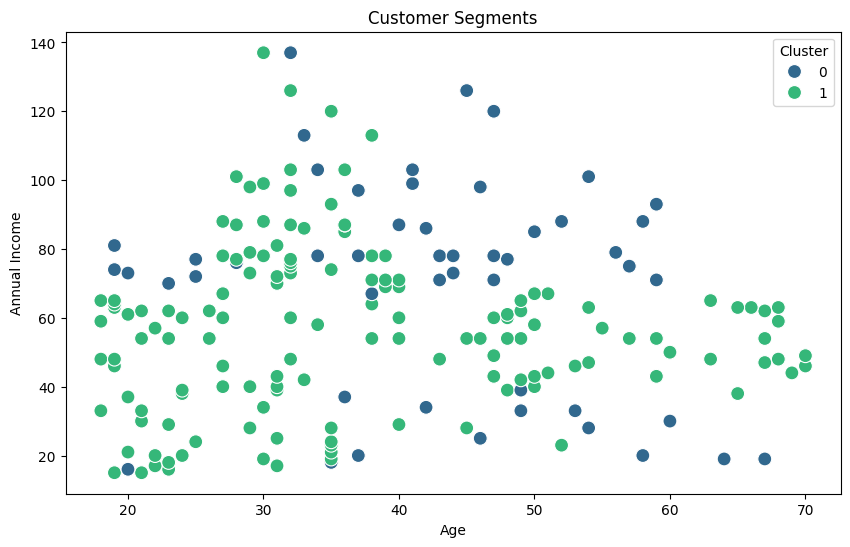

In [51]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Annual Income (k$)'], hue=df['cluster'], palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend(title='Cluster')
plt.show()

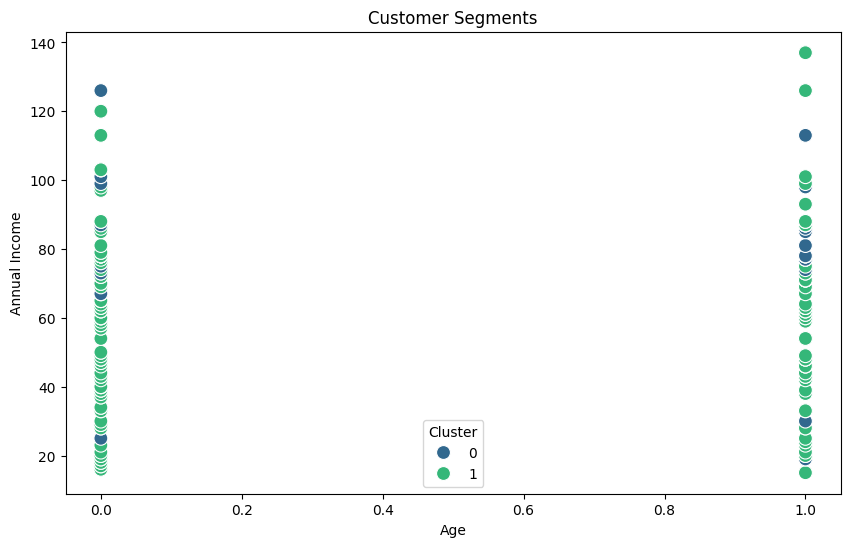

In [52]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Genre'], y=df['Annual Income (k$)'], hue=df['cluster'], palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend(title='Cluster')
plt.show()

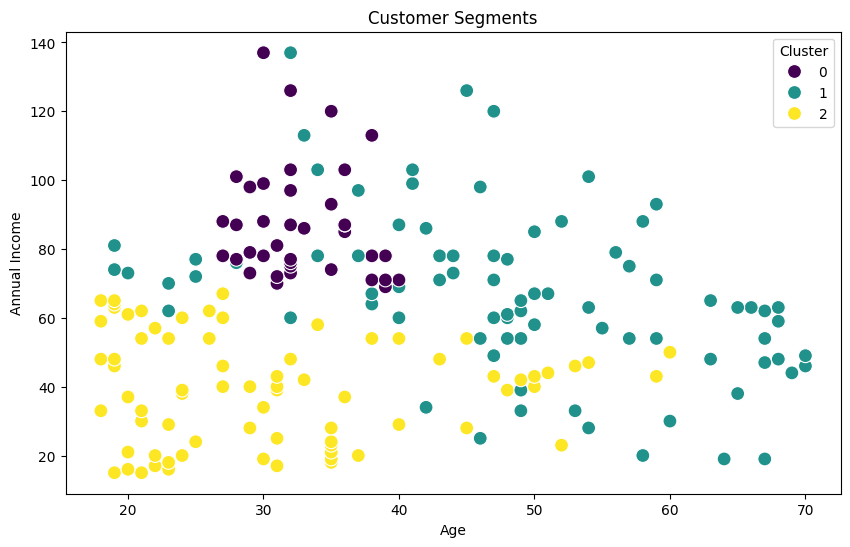

In [55]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df['cluster'] = kmeans.labels_
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Annual Income (k$)'], hue=df['cluster'], palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend(title='Cluster')
plt.show()

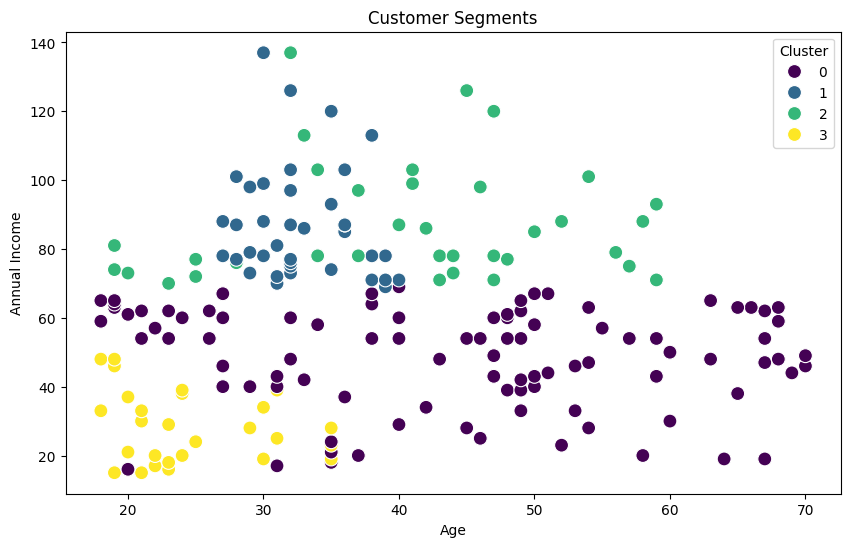

In [56]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
df['cluster'] = kmeans.labels_
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Annual Income (k$)'], hue=df['cluster'], palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend(title='Cluster')
plt.show()

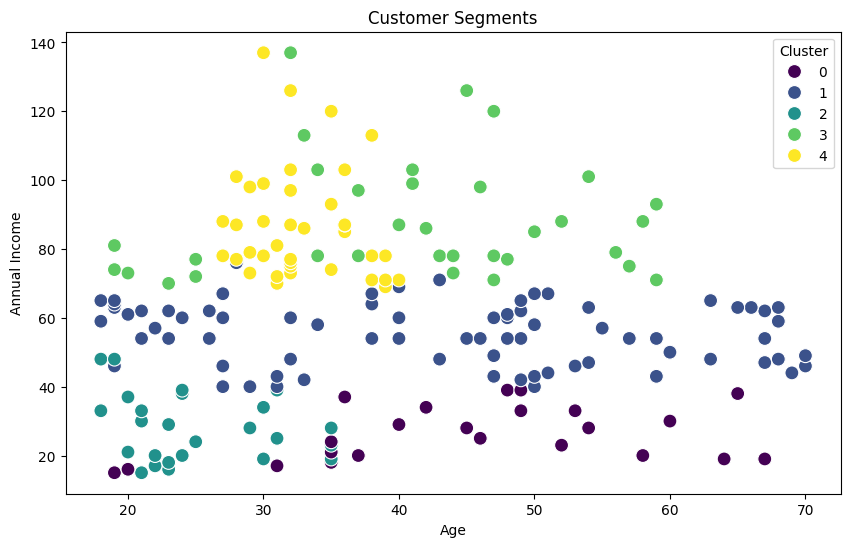

In [57]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
df['cluster'] = kmeans.labels_
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Annual Income (k$)'], hue=df['cluster'], palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend(title='Cluster')
plt.show()

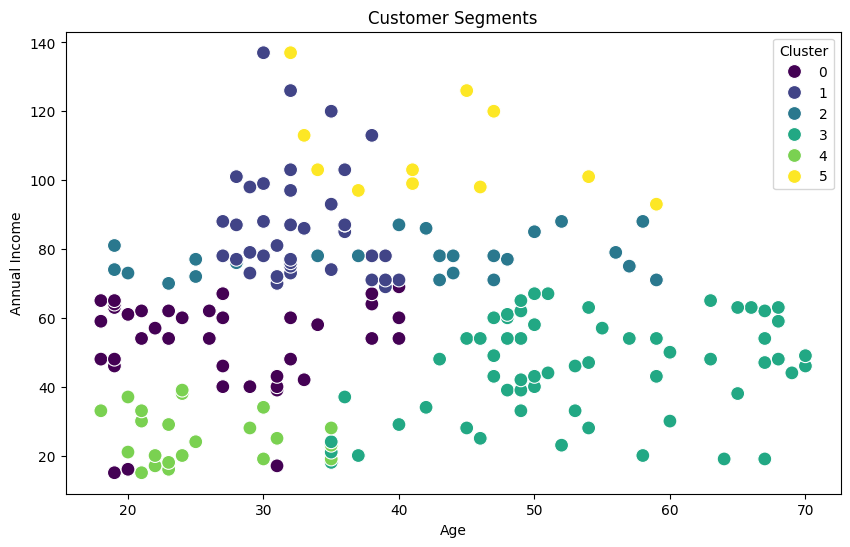

In [58]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
df['cluster'] = kmeans.labels_
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Annual Income (k$)'], hue=df['cluster'], palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend(title='Cluster')
plt.show()

# **Finding K-value -**

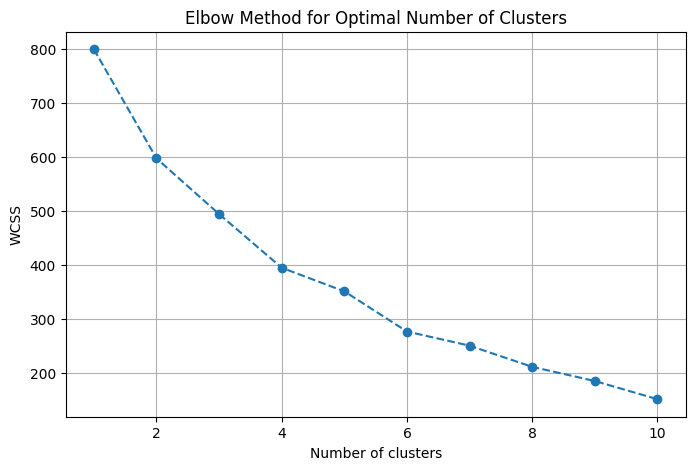

In [59]:
import matplotlib.pyplot as plt

# Assuming X_scaled is your scaled feature dataset
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)  # Fixed random_state
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [71]:
wcss

[800.0000000000003,
 597.9472937932284,
 494.8037500130456,
 395.3920903479796,
 351.7432061711911,
 277.3897401985192,
 251.15484911190165,
 211.98576294959312,
 185.72807688711433,
 152.02983429775693]

In [69]:
# Train the K-means model with the optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster,Cluster
0,1,1,19,15,39,2,"KMeans(n_clusters=4, random_state=42)"
1,2,1,21,15,81,2,"KMeans(n_clusters=4, random_state=42)"
2,3,0,20,16,6,0,"KMeans(n_clusters=4, random_state=42)"
3,4,0,23,16,77,2,"KMeans(n_clusters=4, random_state=42)"
4,5,0,31,17,40,0,"KMeans(n_clusters=4, random_state=42)"


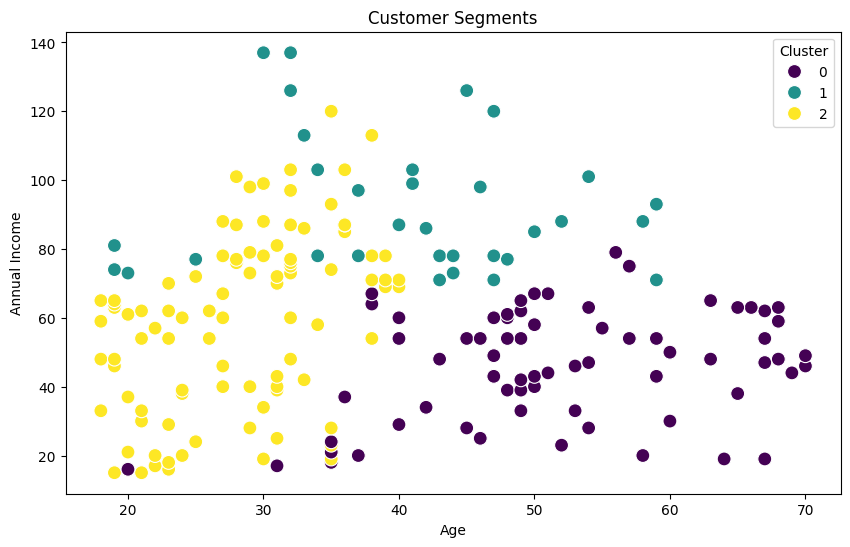

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Annual Income (k$)'], hue=df['cluster'], palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend(title='Cluster')
plt.show()

In [72]:
from sklearn.metrics import silhouette_score

In [75]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    m = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, m)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.29307334005502633
For n_clusters = 3 The average silhouette_score is : 0.383798873822341
For n_clusters = 4 The average silhouette_score is : 0.3921703094115865
For n_clusters = 5 The average silhouette_score is : 0.37688936241822546
For n_clusters = 6 The average silhouette_score is : 0.4506571000847437
